In [1]:
# @title Import Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# @title Load data
df = pd.read_csv('top10s.csv',encoding='ISO-8859-1')
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [4]:
df.columns

Index(['Unnamed: 0', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [5]:
df.isna().sum()

Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
print(df['title'].nunique())
print(df['artist'].nunique())
print(df['top genre'].nunique())

584
184
50


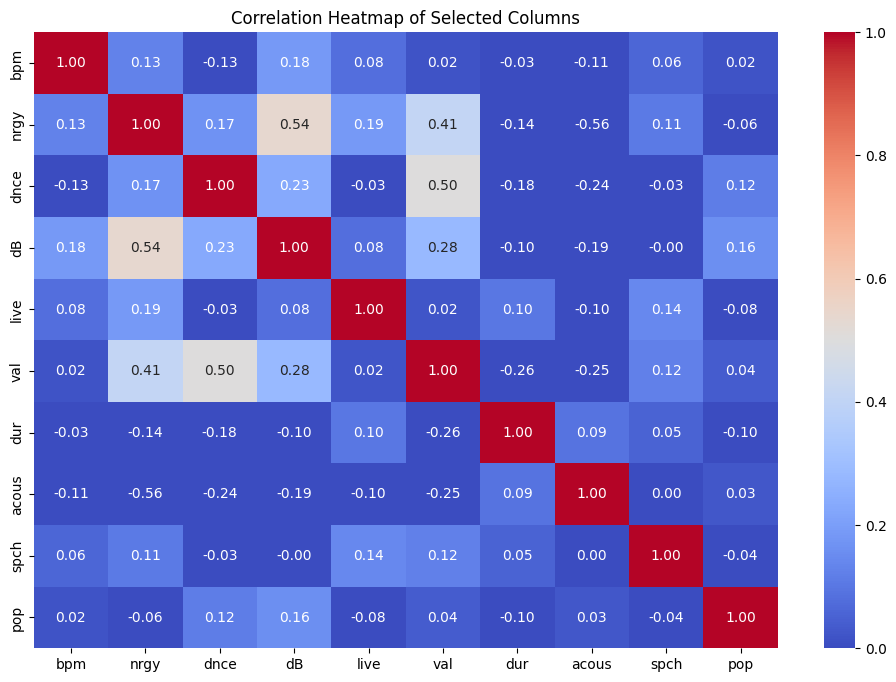

In [8]:
# @title checking the correlation
selected_columns = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']

# Extracting the selected columns
df_selected = df[selected_columns]

# Calculating the correlation matrix
correlation_matrix = df_selected.corr()

# Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

In [9]:
# @title Checking for the the outliers

popularity_by_year = df.groupby('year')['pop'].mean().reset_index()

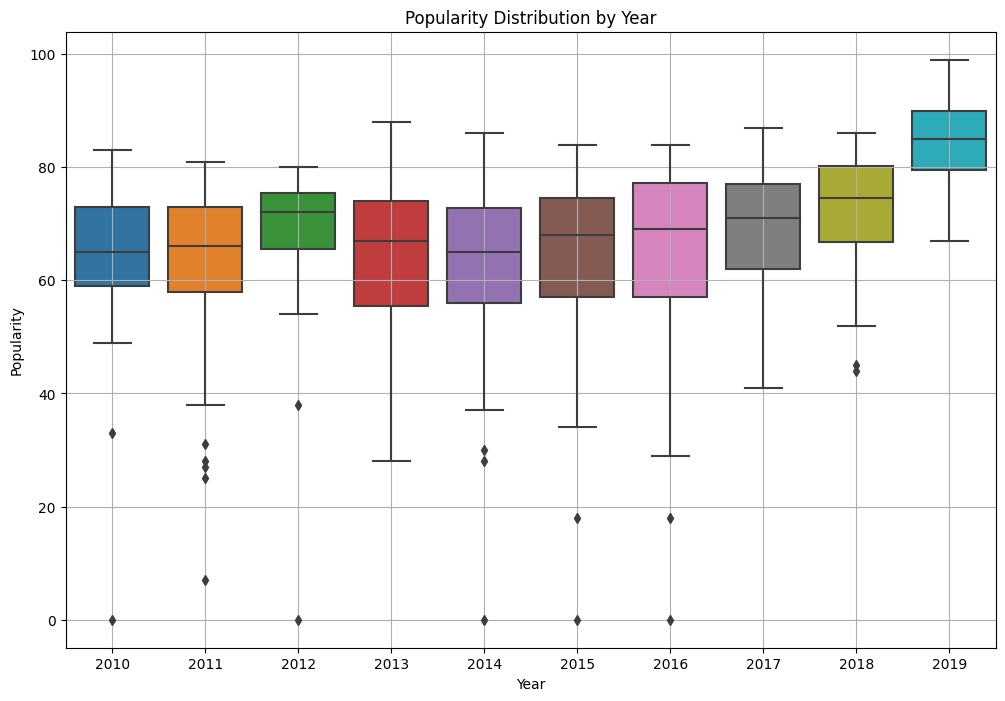

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [10]:
#plot the data

plt.figure(figsize=(12, 8))
sns.boxplot(x='year', y='pop', data=df)
plt.title('Popularity Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()
df.head()

In [11]:
#statistics of the dataset

popularity_stats_by_year = df.groupby('year')['pop'].describe()
print(popularity_stats_by_year)
df.head()

      count       mean        std   min    25%   50%    75%   max
year                                                             
2010   51.0  64.254902  13.227007   0.0  59.00  65.0  73.00  83.0
2011   53.0  61.867925  16.058831   7.0  58.00  66.0  73.00  81.0
2012   35.0  67.771429  14.528037   0.0  65.50  72.0  75.50  80.0
2013   71.0  63.985915  12.864673  28.0  55.50  67.0  74.00  88.0
2014   58.0  62.706897  15.545077   0.0  56.00  65.0  72.75  86.0
2015   95.0  64.568421  14.352443   0.0  57.00  68.0  74.50  84.0
2016   80.0  64.162500  16.237512   0.0  57.00  69.0  77.25  84.0
2017   65.0  69.015385  10.982219  41.0  62.00  71.0  77.00  87.0
2018   64.0  72.437500   9.870390  44.0  66.75  74.5  80.25  86.0
2019   31.0  84.354839   8.292761  67.0  79.50  85.0  90.00  99.0


,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [12]:
# way to remove the outliers just by changing the range

for i in range(2):
    Q1 = df['pop'].quantile(0.25)
    Q3 = df['pop'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df['pop'] >= lower_bound) & (df['pop'] <= upper_bound)]
    df.head()

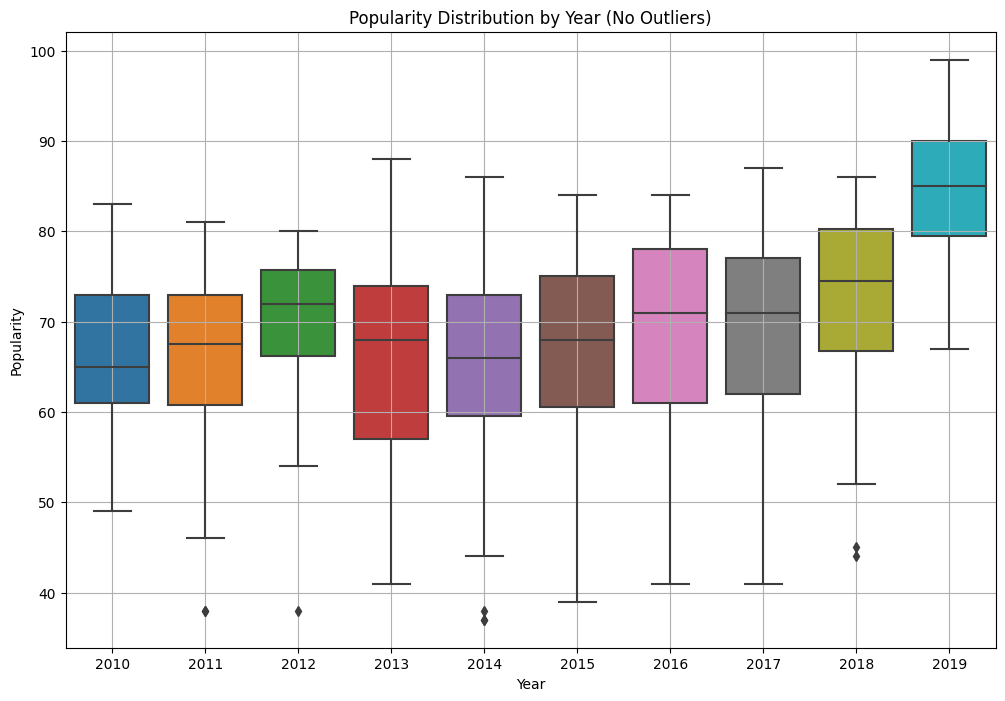

In [13]:
#if we remove the outliers, the codeblock for again plotting the data without outliers

plt.figure(figsize=(12, 8))
sns.boxplot(x='year', y='pop', data=df)
plt.title('Popularity Distribution by Year (No Outliers)')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

In [14]:
#statistics just after removing the outliers

popularity_stats_no_outliers = df.groupby('year')['pop'].describe()
print(popularity_stats_no_outliers)

      count       mean        std   min    25%   50%    75%   max
year                                                             
2010   49.0  66.204082   8.485231  49.0  61.00  65.0  73.00  83.0
2011   48.0  65.854167  10.274922  38.0  60.75  67.5  73.00  81.0
2012   34.0  69.764706   8.613094  38.0  66.25  72.0  75.75  80.0
2013   68.0  65.352941  11.289626  41.0  57.00  68.0  74.00  88.0
2014   55.0  65.072727  11.594786  37.0  59.50  66.0  73.00  86.0
2015   91.0  66.439560  11.033493  39.0  60.50  68.0  75.00  84.0
2016   73.0  67.794521  11.046567  41.0  61.00  71.0  78.00  84.0
2017   65.0  69.015385  10.982219  41.0  62.00  71.0  77.00  87.0
2018   64.0  72.437500   9.870390  44.0  66.75  74.5  80.25  86.0
2019   31.0  84.354839   8.292761  67.0  79.50  85.0  90.00  99.0


In [15]:
# @title Encoding the string features

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming df is your DataFrame
vectorizer = TfidfVectorizer()

# Combine text from 'title', 'artist', and 'top genre' into a single column
#combined_text = df['title'] + ' ' + df['artist'] + ' ' + df['top genre']
combined_text = df['top genre']


# Transform the combined text using the vectorizer
text_matrix = vectorizer.fit_transform(combined_text)

# Extract feature names
feature_names = vectorizer.get_feature_names_out()

# Create DataFrames for each text column
#title_matrix = pd.DataFrame(vectorizer.transform(df['title']).toarray(), columns=[f'title_{name}' for name in feature_names])
#artist_matrix = pd.DataFrame(vectorizer.transform(df['artist']).toarray(), columns=[f'artist_{name}' for name in feature_names])
top_genre_matrix = pd.DataFrame(vectorizer.transform(df['top genre']).toarray(), columns=[f'top_genre_{name}' for name in feature_names])

# Concatenate the matrices with the original DataFrame
#df = pd.concat([df, title_matrix, artist_matrix, top_genre_matrix], axis=1)
df = pd.concat([df, top_genre_matrix], axis=1)
#df = pd.concat([df, title_matrix, top_genre_matrix], axis=1)

In [16]:
#drop the unwanted columns

df_old=df
df=df.drop('title',axis=1)
df=df.drop('artist',axis=1)
df=df.drop('top genre',axis=1)
df.head()

,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,...,top_genre_pop,top_genre_rap,top_genre_rock,top_genre_room,top_genre_singer,top_genre_songwriter,top_genre_soul,top_genre_trap,top_genre_tropical,top_genre_wave
0,1.0,2010.0,97.0,89.0,67.0,-4.0,8.0,80.0,217.0,19.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2010.0,87.0,93.0,75.0,-5.0,52.0,64.0,263.0,24.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,2010.0,120.0,84.0,76.0,-3.0,29.0,71.0,200.0,10.0,...,0.613664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,2010.0,119.0,92.0,70.0,-4.0,8.0,71.0,295.0,0.0,...,0.613664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,2010.0,109.0,84.0,64.0,-5.0,9.0,43.0,221.0,2.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# @title Classified the target variable


# Calculate the median popularity for each year
median_popularity_by_year = df.groupby('year')['pop'].median()

# Create labels based on median popularity values
labels = ['Miss', 'Hit']

# Assign labels to each year based on median popularity
df['pop_classification'] = df['year'].map(median_popularity_by_year)
df['pop_classification'] = pd.cut(df['pop_classification'], bins=[df['pop_classification'].min(), df['pop_classification'].median(), df['pop_classification'].max()], labels=labels, right=False)

# Display the count of each label
classification_counts = df['pop_classification'].value_counts()
print(classification_counts)

# Display statistical summary of popularity for each year without outliers
popularity_stats_no_outliers = df.groupby('year')['pop'].describe()
print(popularity_stats_no_outliers)

Hit     395
Miss    152
Name: pop_classification, dtype: int64
        count       mean        std   min    25%   50%    75%   max
year                                                               
2010.0   49.0  66.204082   8.485231  49.0  61.00  65.0  73.00  83.0
2011.0   48.0  65.854167  10.274922  38.0  60.75  67.5  73.00  81.0
2012.0   34.0  69.764706   8.613094  38.0  66.25  72.0  75.75  80.0
2013.0   68.0  65.352941  11.289626  41.0  57.00  68.0  74.00  88.0
2014.0   55.0  65.072727  11.594786  37.0  59.50  66.0  73.00  86.0
2015.0   91.0  66.439560  11.033493  39.0  60.50  68.0  75.00  84.0
2016.0   73.0  67.794521  11.046567  41.0  61.00  71.0  78.00  84.0
2017.0   65.0  69.015385  10.982219  41.0  62.00  71.0  77.00  87.0
2018.0   64.0  72.437500   9.870390  44.0  66.75  74.5  80.25  86.0
2019.0   31.0  84.354839   8.292761  67.0  79.50  85.0  90.00  99.0


In [18]:
df.isna().sum()

Unnamed: 0            25
year                  25
bpm                   25
nrgy                  25
dnce                  25
                      ..
top_genre_soul        25
top_genre_trap        25
top_genre_tropical    25
top_genre_wave        25
pop_classification    56
Length: 67, dtype: int64

In [19]:
df = df.dropna()
df.isna().sum()

Unnamed: 0            0
year                  0
bpm                   0
nrgy                  0
dnce                  0
                     ..
top_genre_soul        0
top_genre_trap        0
top_genre_tropical    0
top_genre_wave        0
pop_classification    0
Length: 67, dtype: int64

In [20]:
#dB values are negative so, let shift them
min_dB = df['dB'].min()
df['dB'] = df['dB'] + abs(min_dB)
min_dB

<ipython-input-20-1f5d4bd188b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dB'] = df['dB'] + abs(min_dB)


-15.0

In [21]:
#feature engineering

X = df.drop(['pop', 'pop_classification'], axis=1)
y = df['pop_classification']


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# splitting the training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier (MultinomialNB is commonly used for text data)
global predictions
global accuracy
global naive_bayes_classifier

accuracy=0
def Hyper(Alpha):
  tmp_naive_bayes_classifier = MultinomialNB(alpha=Alpha)

  # Train the classifier
  tmp_naive_bayes_classifier.fit(X_train, y_train)

  # Make predictions on the test set
  tmp_predictions = tmp_naive_bayes_classifier.predict(X_test)

  # Evaluate the classifier
  tmp_accuracy = accuracy_score(y_test, tmp_predictions)
  return [tmp_accuracy,tmp_predictions,tmp_naive_bayes_classifier]

In [23]:
#Hyperparameter optimization

A=[]
AC=[]
for a in range(1,1001):
  H = Hyper(a)
  ac = H[0]
  A.append(a)
  AC.append(ac)
  if accuracy<ac:
    accuracy = ac
    predictions = H[1]
    naive_bayes_classifier = H[2]
    print(a,':',accuracy)

1 : 0.7454545454545455
24 : 0.7545454545454545
71 : 0.7636363636363637
82 : 0.7727272727272727
109 : 0.7818181818181819
120 : 0.7909090909090909
137 : 0.8
162 : 0.8090909090909091
164 : 0.8272727272727273
173 : 0.8363636363636363
175 : 0.8454545454545455
190 : 0.8545454545454545
193 : 0.8636363636363636
234 : 0.8727272727272727
263 : 0.8818181818181818
297 : 0.8909090909090909
312 : 0.9


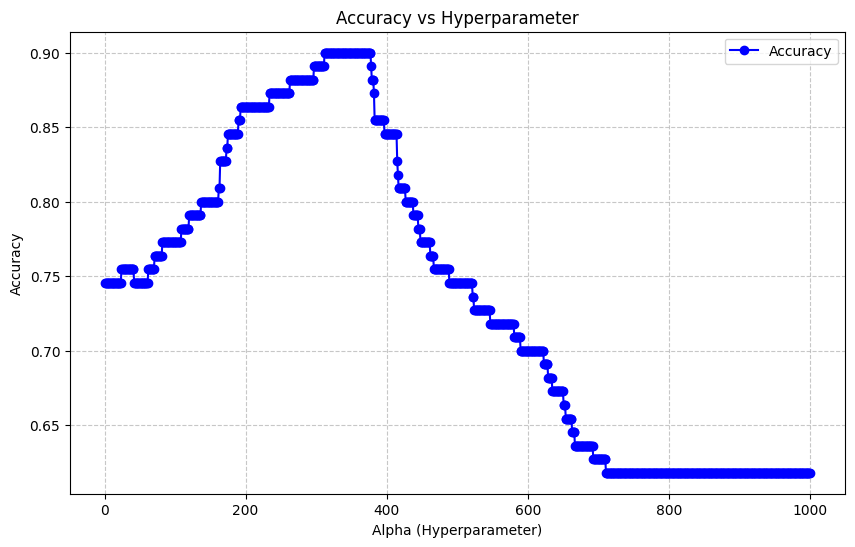

In [24]:
# accuracy plot for hyperparameter value

plt.figure(figsize=(10, 6))
plt.plot(A, AC, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Accuracy vs Hyperparameter')
plt.xlabel('Alpha (Hyperparameter)')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


Accuracy: 0.9
Confusion Matrix:
[[68  0]
 [11 31]]
Classification Report:
              precision    recall  f1-score   support

         Hit       0.86      1.00      0.93        68
        Miss       1.00      0.74      0.85        42

    accuracy                           0.90       110
   macro avg       0.93      0.87      0.89       110
weighted avg       0.91      0.90      0.90       110



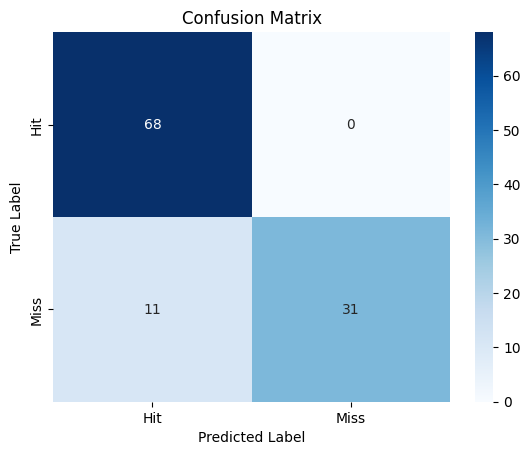

In [25]:
#visualize the output

conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=naive_bayes_classifier.classes_, yticklabels=naive_bayes_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# @title check the accuracy for training dataset
global train_predictions
global train_accuracy
global train_naive_bayes_classifier

train_accuracy=0
def train_Hyper(Alpha):
  train_tmp_naive_bayes_classifier = MultinomialNB(alpha=Alpha)

  # Train the classifier
  train_tmp_naive_bayes_classifier.fit(X_train, y_train)

  # Make predictions on the test set
  train_tmp_predictions = train_tmp_naive_bayes_classifier.predict(X_train)

  # Evaluate the classifier
  train_tmp_accuracy = accuracy_score(y_train, train_tmp_predictions)
  return [train_tmp_accuracy,train_tmp_predictions,train_tmp_naive_bayes_classifier]

In [27]:
train_A=[]
train_AC=[]
for a in range(1,1001):
  train_H = train_Hyper(a)
  train_ac = train_H[0]
  train_A.append(a)
  train_AC.append(train_ac)
  if train_accuracy<train_ac:
    train_accuracy = train_ac
    train_predictions = train_H[1]
    train_naive_bayes_classifier = train_H[2]
    print(a,':',train_accuracy)

1 : 0.7162471395881007
9 : 0.7185354691075515
34 : 0.7208237986270023
53 : 0.7231121281464531
55 : 0.7254004576659039
56 : 0.7276887871853547
65 : 0.7299771167048055
68 : 0.7322654462242563
69 : 0.7345537757437071
72 : 0.7368421052631579
78 : 0.7391304347826086
97 : 0.7459954233409611
101 : 0.7482837528604119
102 : 0.7505720823798627
103 : 0.7528604118993135
108 : 0.7551487414187643
110 : 0.7574370709382151
112 : 0.7597254004576659
120 : 0.7620137299771167
121 : 0.7643020594965675
125 : 0.7665903890160183
130 : 0.7688787185354691
131 : 0.7711670480549199
132 : 0.7734553775743707
133 : 0.7757437070938215
143 : 0.7780320366132724
149 : 0.7803203661327232
152 : 0.782608695652174
153 : 0.7848970251716247
155 : 0.7871853546910755
157 : 0.7894736842105263
158 : 0.7917620137299771
160 : 0.7940503432494279
164 : 0.7963386727688787
168 : 0.7986270022883295
173 : 0.8009153318077803
178 : 0.8032036613272311
180 : 0.8054919908466819
191 : 0.8077803203661327
192 : 0.8100686498855835
193 : 0.8123569

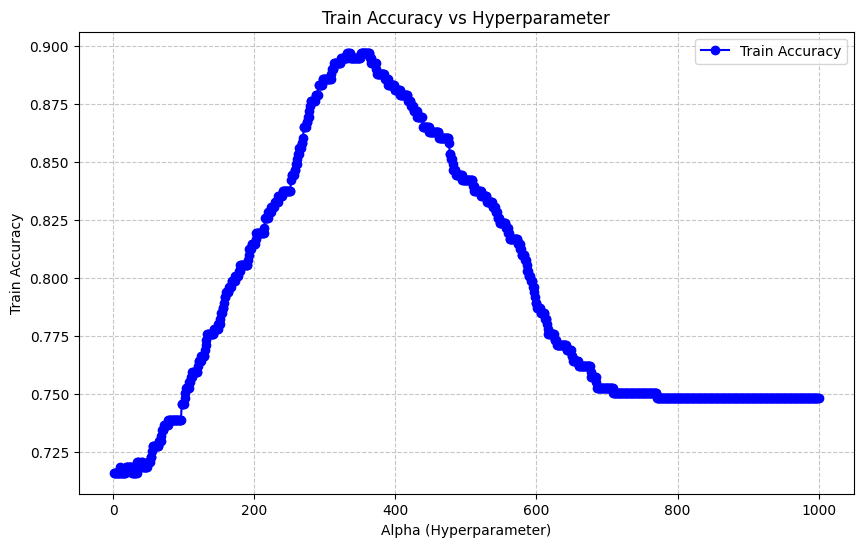

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(train_A, train_AC, marker='o', linestyle='-', color='b', label='Train Accuracy')
plt.title('Train Accuracy vs Hyperparameter')
plt.xlabel('Alpha (Hyperparameter)')
plt.ylabel('Train Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Train Accuracy: 0.897025171624714
Confusion Matrix:
[[326   1]
 [ 44  66]]
Classification Report:
              precision    recall  f1-score   support

         Hit       0.88      1.00      0.94       327
        Miss       0.99      0.60      0.75       110

    accuracy                           0.90       437
   macro avg       0.93      0.80      0.84       437
weighted avg       0.91      0.90      0.89       437



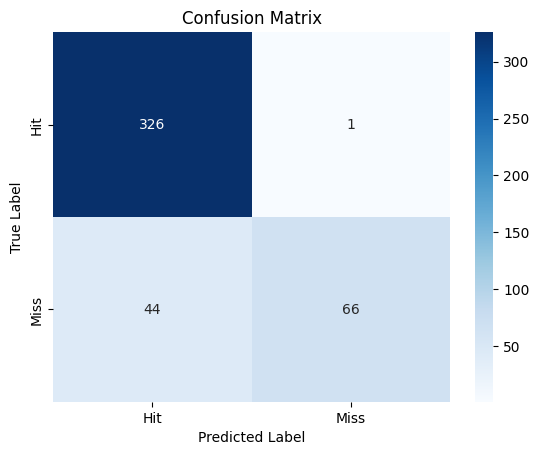

In [29]:
train_conf_matrix = confusion_matrix(y_train, train_predictions)
train_classification_rep = classification_report(y_train, train_predictions)

print(f"Train Accuracy: {train_accuracy}")
print("Confusion Matrix:")
print(train_conf_matrix)
print("Classification Report:")
print(train_classification_rep)
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_naive_bayes_classifier.classes_, yticklabels=train_naive_bayes_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()